## 단일집단 t 검정
## stats.ttest_1samp(샘플, 평균)
## 정규성검증 shapiro

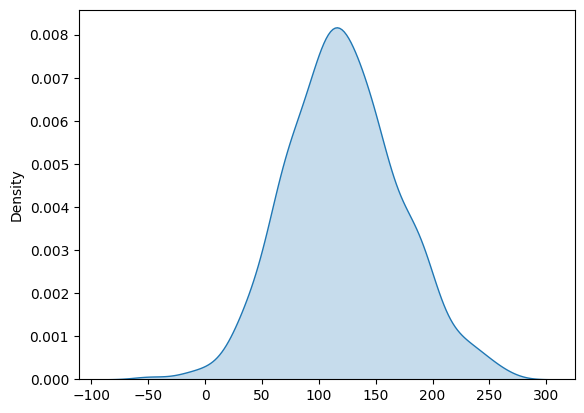

samples are satisfied for normality as group1: 0.37
t =  -1.6766176438265123
p =  0.9528782063428175


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

no_samples = 500 # 샘플수

group = stats.norm(120,50).rvs(no_samples)
sns.kdeplot(data = group, fill = True) #라인그래프 그려짐.
plt.show()

pv_of_group = stats.shapiro(group)[1] # p value -> 정규성 가지고 있는지 검정 Test

if pv_of_group > 0.05:
     print("samples are satisfied for normality as group1: %3.2f" %(pv_of_group))
     
     t,p = stats.ttest_1samp(group,125, alternative="greater") #변경
     print("t = ", t) # t 통계량에 의한 유의확률이 얼마가 나오는지 구한다. t=-2.46
     print("p = ", p) # p-value는 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 
     
# 양측검정 / 단측검정
     
else:
     print("normality test is not satisfied")

## 남자어린이 키
## 1196,1340,1232,1184,1295,1247,1201,1182,1192,1287,1159,1160,1243,1264,1276

In [2]:
data = [1196,1340,1232,1184,1295,1247,1201,1182,1192,1287,1159,1160,1243,1264,1276] # 모평균 1220과 비교

pv_of_group=stats.shapiro(data)[1]
pv_of_group

t,p = stats.ttest_1samp(data,1220, alternative="greater") #한쪽 검증으로 해야 한다. 
print("t = ", t) 
print("p = ", p)

t =  0.7528774249715862
p =  0.2319980980012078


## 여아 신생아의 몸무게
## 3837,3334,2208,1745,2576,3208,3746,3523,3430,3480,3116,3428,2184,2383,3500,3866,3542,3278

In [3]:
data = [3837,3334,2208,1745,2576,3208,3746,3523,3430,3480,3116,3428,2184,2383,3500,3866,3542,3278]
# 모평균 2800과 비교
pv_of_group=stats.shapiro(data)[1]
pv_of_group

t,p = stats.ttest_1samp(data,2800, alternative="greater") #한쪽 검증으로 해야 한다. 
print("t = ", t) 
print("p = ", p)
#여아 신생아 모집단은 2800 사실이 아니라고 주장할 수 있다. 

t =  2.233187669387536
p =  0.01963422086530109


## 단일집단 비율에 대한 검증
## z 통계량 / p-value

In [4]:
from statsmodels.stats.proportion import proportions_ztest 
count = 45
nobs = 100
val = 0.35
z, p = proportions_ztest(count=count, nobs=nobs, value=val)
print(z)
print(p)

2.0100756305184246
0.04442318485000599


## random 변수 발생
## 단측검정 proportions_ztest : larger

In [5]:
from statsmodels.stats.proportion import proportions_ztest
import random as rd
import numpy as np

# 샘플 수
nobs = 100

# 난수 생성
rd.seed(88)
nums = rd.sample(range(400, 500), 100)
nums = np.array(nums) / 100.0

# 특정 조건을 만족하는 개수 계산
count = len(nums[nums < 4.06]) + len(nums[nums > 4.94])

# 가설 검정
val = 0.1
z, p = proportions_ztest(count=count, nobs=nobs, value=val, alternative='larger')

print("Z-score:", z)
print("p-value:", p)



Z-score: 0.31960138605029637
p-value: 0.3746352617642287


## 두 모집단의 평균차이 검정

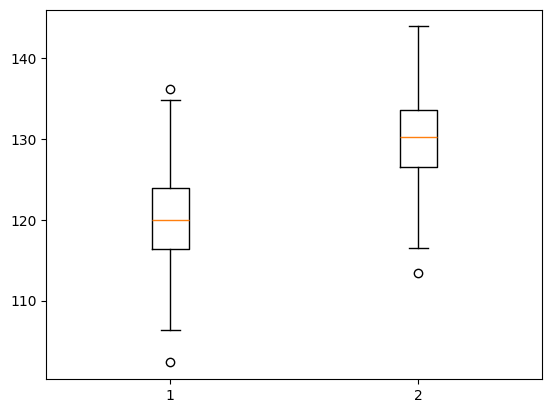

0.7798840154067185 0.46842019217504866
LeveneResult(statistic=0.655725070732946, pvalue=0.4182662499277575)


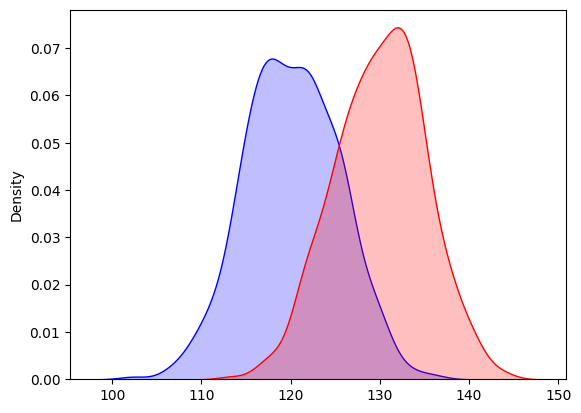

2 samples are satisfied for normality as group1: 0.78, group2: 0.47
t = -30.168678983880895
p = 1.2680300221949891e-142


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

no_samples1 = 500
no_samples2 = 500

group1 = stats.norm(120,5).rvs(no_samples1)
group2 = stats.norm(130,5).rvs(no_samples2)


plot_data = [group1, group2] #플롯 데이터 group data
plt.boxplot(plot_data) #box data box plot
plt.show()


pv_of_group1 = stats.shapiro(group1)[1] #정규성 검토 shapiro[1]
pv_of_group2 = stats.shapiro(group2)[1] #p-value 값 check

print(pv_of_group1,pv_of_group2)

print(stats.levene(group1,group2)) #levene 등분산성 검정 group 1과 group 2 비교, p-value <0.05 : 영가설을 기각한다(분산이 다르다.)
#병원 임상실험 평균이 같냐 다르냐, 등분산성 검정 같다고 가정하는 경우. 30명 이상의 sample을 가지고, 정규성과 등분산성이 보장되었다고 가정한다. 

sns.kdeplot(x=group1, color = 'b', fill = True)
sns.kdeplot(x=group2, color = 'r', fill = True)
plt.show()

if pv_of_group1 > 0.05 and pv_of_group2 > 0.05: #정규성 통과하는지 check한다. 정규성 보장 여부 확인. 
     print("2 samples are satisfied for normality as group1: %3.2f, group2: %3.2f"\
           %(pv_of_group1,pv_of_group2))
     pv_of_var = stats.levene(group1,group2)[1] #등분산성 테스트 하게 되면 
     if pv_of_var > 0.05:
           t,p = stats.ttest_ind(group1,group2, alternative='two-sided') #양측 검정
           print("t = " + str(t)) 
           print("p = " + str(p))

else: #else 비모수 검정 ks-2sample 비모수 검정
     print("Non-parametric test result")
     print(stats.kruskal(group1, group2))
     print(stats.ks_2samp(group1, group2))
     
     #그림 동그라미 이상치 box plot 뒤 0.43: P값 0.05보다 크므로 영가설 채택, 정규성 확보된다.
     #leven 등분산성 pvalue 0.33 0.05보다 크다 영가설을 기각할 수 없다. 분산이 같다고 통계적으로 증명한다. t-test 할 수 있는 표본이다. 
     #분산이 크면 겹치는 부분이 많아진다. 
     #두개가 확연히 다른 표본임을 알 수 있다. 
     #마지막 결과적으로 else값이 안찍히고 if t,p = stats.ttest_ind(group1,group2, alternative='two-sided') t=-32, p=2.3^-156=0 완전히 다르다.
     #영가설을 기각하여 두분산이 서로 다르다는 것을 보여준다. 

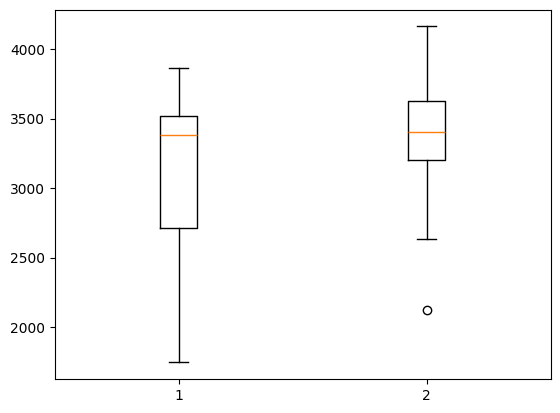

0.017984789994719325 0.20224825440795424
LeveneResult(statistic=1.8154103472308154, pvalue=0.18508483634639294)


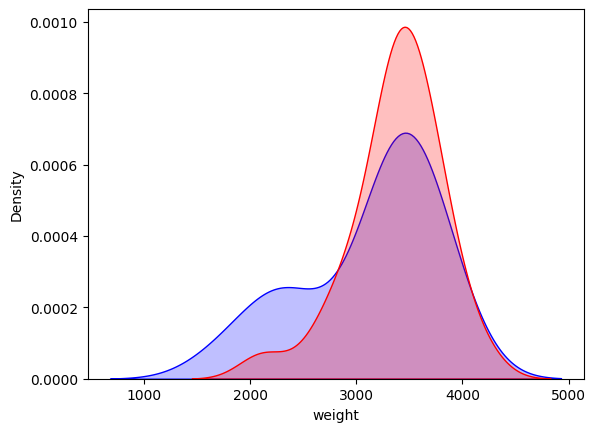

-14.92475072753509 6.433393580802154e-46


In [19]:
import pandas as pd
import scipy.stats as stats

data = pd.read_csv('babyweight.csv')
girl = data[data['gender'] == 1]['weight']
boy = data[data['gender'] == 2]['weight']

girl.head()
#시험 - 분산분석_boxplot
plot_data = [girl, boy] #플롯 데이터 group data
plt.boxplot(plot_data) #box data box plot #girl의 분산은 크게 나온다. 평균은 girl이 작다. 
plt.show()

pv_of_group1 = stats.shapiro(girl)[1] #정규성 검토 shapiro[1] 
#시험문제? 정규성은 0.2가 나왔다. (그렇다면? A.귀무가설을 채택하고 대립가설을 기각한다. ) 
# leven은 0.2가 나왔다. 등분산성이 보장되는가(그렇다면? A.만약 0.2가 등분산성 검정의 p-값이라면, 일반적으로 p-값이 0.05보다 크면 귀무가설을 기각하지 못하게 되어 등분산성이 있다고 판단할 수 있습니다. )

pv_of_group2 = stats.shapiro(boy)[1] #p-value 값 check
print(pv_of_group1,pv_of_group2)

print(stats.levene(girl,boy))#등분산이 거의 일치한다고 볼 수 있다. T-test를 했을 때 P값이 아주 작은 것으로 예상된다. 

sns.kdeplot(x=girl, color = 'b', fill = True)
sns.kdeplot(x=boy, color = 'r', fill = True)
plt.show()

t,p = stats.ttest_ind(group1,group2, alternative='less')
print(t,p)


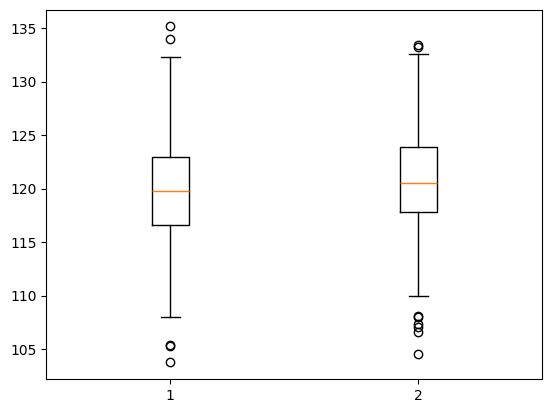

2 samples are satisfied for normality as group1: 0.99, group2: 0.16
TtestResult(statistic=-2.7539470912550064, pvalue=0.006102996782569363, df=499)
TtestResult(statistic=-2.7539470912550064, pvalue=0.006102996782569363, df=499)


In [33]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import scipy.stats as stats

no_samples1 = 500
no_samples2 = 500

group1 = stats.norm(120,5).rvs(no_samples1)
group2 = stats.norm(120.5,5).rvs(no_samples2)


plot_data = [group1, group2]
plt.boxplot(plot_data)
plt.show()


pv_of_group1 = stats.shapiro(group1)[1]#정규성 검토 
pv_of_group2 = stats.shapiro(group2)[1]

if pv_of_group1 > 0.05 and pv_of_group2 > 0.05:
     print("2 samples are satisfied for normality as group1: %3.2f, group2: %3.2f"\
           %(pv_of_group1,pv_of_group2))
     pv_of_var = stats.levene(group1,group2)[1]
     if pv_of_var > 0.05:
           result = stats.ttest_rel(group1,group2, alternative='two-sided')
           print(result)

else:
     print("Non-parametric test result")
     print(stats.kruskal(group1, group2))
     print(stats.ks_2samp(group1, group2))

result = stats.ttest_rel(group1,group2, alternative='two-sided')
print(result)
     

## anorexia.csv 파일 받아서 검정

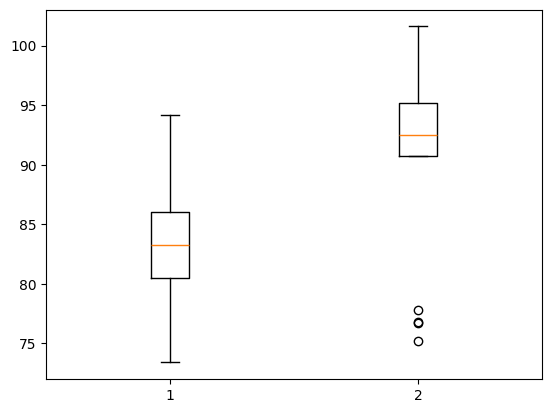

0.9972152751374112
0.007390658102599353
0.19556137777872615
TtestResult(statistic=-4.184908135290033, pvalue=0.00035012655280026967, df=16)


In [32]:
import numpy as np
from scipy import stats
import pandas as pd
import scipy.stats as stats

data = pd.read_csv('anorexia.csv')

group1=data['Prior']
group2=data['Post']

plot_data = [group1, group2]
plt.boxplot(plot_data)
plt.show()

pv_of_group1 = stats.shapiro(group1)[1]#정규성 검토 
pv_of_group2 = stats.shapiro(group2)[1]

pv_of_var = stats.levene(group1,group2)[1]
    

result = stats.ttest_rel(group1,group2, alternative='less') #0보다 작은 값이 나와야 해서 less가 나와야 한다. 

print(pv_of_group1)
print(pv_of_group2)
print(pv_of_var)
print(result)

In [ ]:
#양측검정과 단측검정
#ttest_rel 함수를 사용하여 두 집단 간의 차이를 검정하는 방법에 대해 설명드리겠습니다. 이 함수는 두 집단의 관측값이 서로 연관되어 있을 때 사용됩니다. 여기서 alternative 매개변수를 다르게 설정하면 세 가지 다른 검정 방법을 수행할 수 있습니다:

#양측검정 (Two-Sided Test):
#양방향으로 가설을 검정하는 방법입니다.
#대립가설은 두 집단의 평균이 서로 다르다고 설정됩니다.
#기각역은 양쪽으로 설정되며, 유의수준을 반으로 나눕니다.
#예를 들어, "두 그룹의 평균이 같지 않다"를 확인할 때 사용합니다.
#왼쪽검정 (One-Sided Test, Less Than):
#한 방향으로 가설을 검정하는 방법입니다.
#대립가설은 첫 번째 집단의 평균이 두 번째 집단의 평균보다 작다고 설정됩니다.
#기각역은 왼쪽으로 설정됩니다.
#예를 들어, "첫 번째 그룹의 평균이 두 번째 그룹의 평균보다 작다"를 확인할 때 사용합니다.
#오른쪽검정 (One-Sided Test, Greater Than):
#한 방향으로 가설을 검정하는 방법입니다.
#대립가설은 첫 번째 집단의 평균이 두 번째 집단의 평균보다 크다고 설정됩니다.
##기각역은 오른쪽으로 설정됩니다.
###예를 들어, "첫 번째 그룹의 평균이 두 번째 그룹의 평균보다 크다"를 확인할 때 사용합니다.

In [ ]:
#T-검정은 두개의 평균을 검정
#같으냐 다르냐 판정하기 위해서는 전제조건: 가정이 있어야 한다. (정규성 비교를 할 때): 두개의 샘플을 정규분포로 가정
#평균이 있고 분산이 있다. 두개의 평균 차이를 비교 의미 있게 벌어져 있느냐 가까이 있느냐 가까이 있으면 얼마나 가까이 있는지 검정 T-test
#같냐 틀리냐를 평균으로 보겠다. 100개 중에서 10차이 5차이가 날 수 있다. 통계적 검증 문제 
#유의수준을 가지고 판단한다. 0.05보다 적은지를 판단. 0.05보다 작다. 정규분포를 할 수 없다. 비모수 검정. Krus, Ktest를 시행해야 한다.
#등분산 검정. leven 검정 

#마지막 값 분석
#약을 투여했을 때 몸무게 그냥 늘었다
#처음: 정규성 정규분포 0.99
#두번째: 정규성 X 정규분포가 아니다
#등분산 0.05보다 크다. 채택한다. 
#result 통계량 -4.1 pvalue-0.0003 효과가 있었다고 주장할 수 있다.  